In [22]:
import os
import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import PIL.Image
import matplotlib.image as mpimg
from keras.utils import Sequence
import random


In [23]:
os.chdir("/home/thebbennett/rooftopNN/Images/compressed/images/")


In [40]:

class DataSeq(Sequence):
    def __init__(self,batch_size,crop_size,img_name_list):
        self.batch_size = batch_size
        self.crop_size = crop_size
        self.img_name_list = img_name_list
    
    def __len__(self,):
        return len(img_name_list)//self.batch_size
    
    def __getitem__(self,idx):
        
        img_names = np.random.choice(self.img_name_list,self.batch_size,replace=False)
        mask_names = [i.replace('train/','valid/') for i in img_names]        
        imgs = [PIL.Image.open(img_name) for img_name in img_names]
        masks = [PIL.Image.open(mask_name) for mask_name in mask_names]
        
        limit_left = 0
        img = imgs[0]
        limit_right = img.size[0] - self.crop_size[0]
        limit_bottom = 0
        limit_top = img.size[1] - self.crop_size[1]
        
        x_array_list = []
        y_array_list = []
        for img,mask in zip(imgs,masks):
            x = np.random.uniform(limit_left,limit_right)
            y = np.random.uniform(limit_bottom,limit_top)
            crop_coordinate_tuple = (x,y,x+self.crop_size[0],y+self.crop_size[1])
            img_crop = img.crop(crop_coordinate_tuple)
            mask_crop = mask.crop(crop_coordinate_tuple)
            if random.randint(0,100) < 50:
                img_crop = np.flip(img_crop)
                mask_crop = np.flip(mask_crop)
            if random.randint(0,100) < 50:
                img_crop = np.rot90(img_crop)
                mask_crop = np.rot90(mask_crop)
            x_array_list.append( np.array(img_crop) )
            y_array_list.append( np.array(mask_crop) )
        batch_y = np.array(y_array_list) / 255
        batch_x = np.array(x_array_list) / 255
    

        
        return batch_x, batch_y[:,:,:,:1]
    

In [41]:
%%capture

path = 'train/*.jpg'   
img_name_list=glob.glob(path)

test = DataSeq(batch_size = 20, crop_size = (256,256),img_name_list = img_name_list)
batch_x, batch_y = test[0]


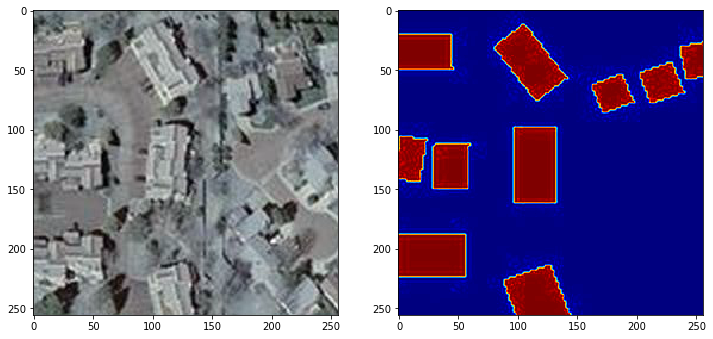

In [44]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.imshow(batch_x[10])
ax2.imshow(batch_y[10,:,:,0],cmap='jet')
fig.savefig("foo.png")

